In [ ]:
!pip install pennylane

In [9]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from random import getrandbits

SAMPLE_SIZE = 512
PREC = 10

dev = qml.device("default.mixed", wires = 1)

@qml.qnode(dev)
def uniform_binary_sampling(t):
    alpha = 2 * pi * getrandbits(t) / 2**t
    gamma = 2 * pi * getrandbits(t) / 2**t
    theta = 2 * pi * getrandbits(t) / 2**t
    qml.Rot(alpha,theta,gamma, wires=0)
    return qml.state()

bad_distribution_samples = [uniform_binary_sampling(PREC) for _ in range(SAMPLE_SIZE)]

In [10]:
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

def density_to_bloch(rho):
    ax = np.trace(np.dot(rho, X)).real
    ay = np.trace(np.dot(rho, Y)).real
    az = np.trace(np.dot(rho, Z)).real
    return [ax, ay, az]

bad_distribution_vectors = np.array([density_to_bloch(s) for s in bad_distribution_samples])

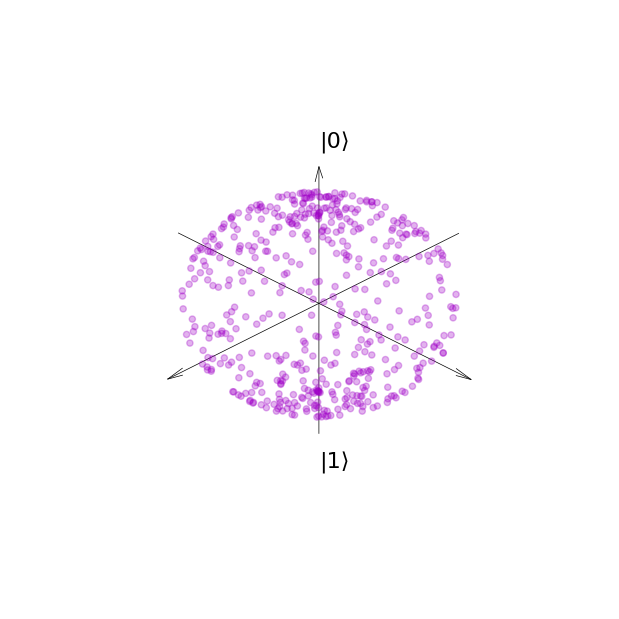

In [11]:
def plot_sphere(vecs):
    fig = plt.figure(figsize=(6,6))
    ax  = fig.add_subplot(111, projection="3d")
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

    ax.grid(False)
    ax.set_axis_off()
    ax.view_init(30,45)

    x, y, z = np.array([[-1.5,0,0], [0,-1.5,0], [0,0,-1.5]])
    u, v, w = np.array([[3,0,0], [0,3,0], [0,0,3]])
    ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.05, color="black", linewidth=0.5)
    ax.text(0, 0, 1.7, r"|0⟩", color="black", fontsize=16)
    ax.text(0, 0, -1.9, r"|1⟩", color="black", fontsize=16)

    ax.scatter(
        vecs[:,0], vecs[:,1], vecs[:, 2], c='#a000c8', alpha=0.3
    )
    plt.show()


plot_sphere(bad_distribution_vectors)

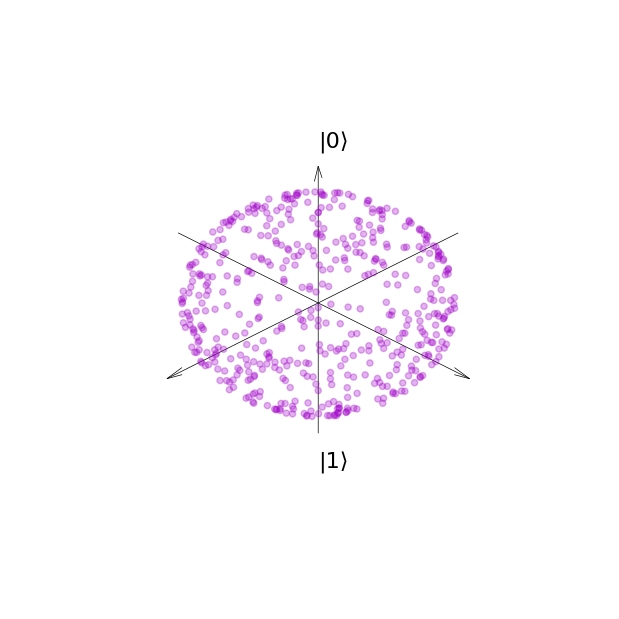

In [12]:
import numpy as np
from scipy.stats import rv_discrete
from scipy.stats import rv_continuous
import pennylane as qml
from random import getrandbits, seed
from math import sqrt, acos

seed(42)

def gen_theta(t):
    t_0 = getrandbits(t)
    step = 4 / 2**t
    low = t_0 * step
    if low < 2:
        return acos(1-low)
    return acos(low - 3)

def haar_random_unitary(t):
    alpha = 2 * np.pi * getrandbits(t) / 2**t
    gamma = 2 * np.pi * getrandbits(t) / 2**t
    theta = gen_theta(t)

    @qml.qnode(dev)
    def circuit():
        qml.Rot(alpha, theta, gamma, wires=0)
        return qml.state()

    return circuit()

haar_samples = [haar_random_unitary(PREC) for _ in range(SAMPLE_SIZE)]
haar_bloch_vectors = np.array([density_to_bloch(s) for s in haar_samples])
plot_sphere(haar_bloch_vectors)